In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import os
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

print("Imported libraries")

Imported libraries


In [3]:
#Excel dosya adını "dosya" ya atayalim
file= 'german_w.xlsx'

In [4]:
#Excel yükle
xl = pd.ExcelFile(file)

In [5]:
#Sayfa adlarını yazdır
print(xl.sheet_names)

['Sheet1']


In [7]:
# DataFrame'e bir sayfayı ada göre yükleyin: german_words
german_words = xl.parse('Sheet1')

In [8]:
#Artik head() fonksiyonu calisabilir!
german_words.head()

,words,ranking
0,der / die / das,1
1,und,2
2,sein,3
3,in,4
4,ein,5


In [9]:
german_words.shape

(500, 2)

In [10]:
#bir de listemizde Nan degeri var mi yok mu diye kontrol edelim
german_words.isnull().any().any()     #any() bir kez yazildiginda sadece sütun kontrolü olur ancak iki kez olunca tüm liste!

False

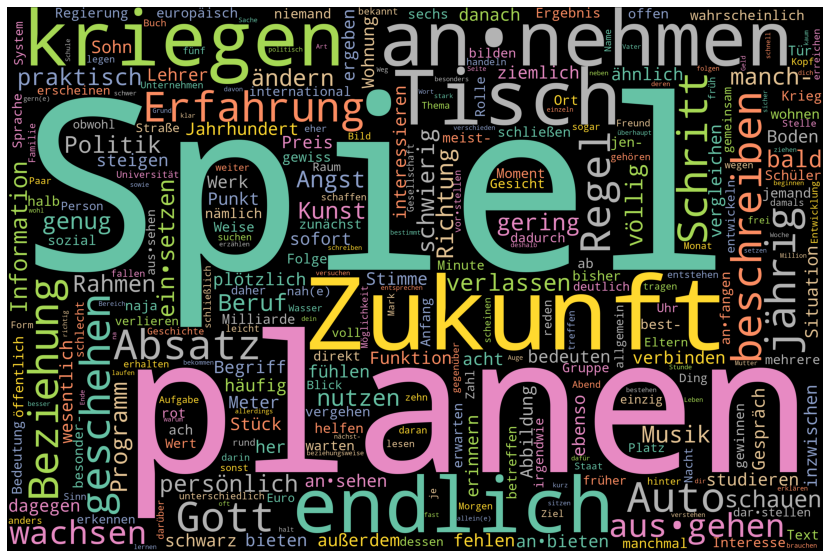

In [11]:
#okunmasi biraz daha kolaylassin cok kücük kelimelerin görünmemesi icin 'max_words=300' secelim 
tuples = [tuple(x) for x in german_words.values]
wordcloud = WordCloud(background_color="black",width=3000, height=2000, max_words=300, 
                      random_state=1, colormap='Set2', collocations=False).generate_from_frequencies(dict(tuples))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [12]:
#ancak frekans degeri olarak algiladigi 'ranking' sütunu listeyi tam tersi olarak döndürdü.
#Yani en sik kullanilan sözcügün (der-die-das) yaninda 1 yazdigi icin wordcloud'da okunmadi bile.
#Bu yüzden "frequency of use" sütunu ekleyerek gercekten en sik kullanilan kelimeler listesini olsuturalim.
#bunun icin her bir word satirina karsilik gelen ranking sütununu tam tersine cevirecegiz

#sütunlar siralamasini tam tersi yapmak icin: df[df.columns[::-1]]
#indeks olarak satirlari tam tersi yapmak icin: df.reindex(index=df.index[::-1])

#Ancak secili bir sütunu terse dogru siralasak da veri cercevesinin üzerine yazma islemini gerceklestiremiyoruz. 
#Bu nedenle manuel olarak frequency of use sütunu olusturacagiz


In [13]:
file= 'german_500.xlsx'
xl = pd.ExcelFile(file)
print(xl.sheet_names)

['Sayfa1']


In [14]:
german_words = xl.parse('Sayfa1')
german_words.head()

,words,ranking,frequency of use
0,der / die / das,1,500
1,und,2,499
2,sein,3,498
3,in,4,497
4,ein,5,496


In [15]:
german_words.drop("ranking",axis=1, inplace=True)
german_words

,words,frequency of use
0,der / die / das,500
1,und,499
2,sein,498
3,in,497
4,ein,496
...,...,...
495,endlich,5
496,kriegen,4
497,Zukunft,3
498,planen,2


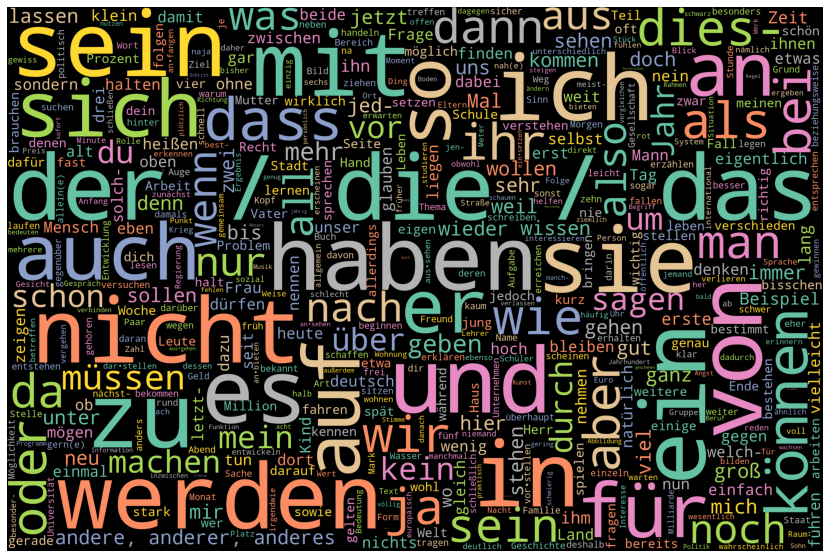

In [16]:
tuples = [tuple(x) for x in german_words.values]
wordcloud = WordCloud(background_color="black",width=3000, height=2000, max_words=500, 
                      random_state=1, colormap='Set2', collocations=False).generate_from_frequencies(dict(tuples))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [17]:
#Goethe silüetinin icini doldurabiliriz:

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib
matplotlib.axes.Axes.imshow
matplotlib.pyplot.imshow
from wordcloud import WordCloud, STOPWORDS

print("Yes, imported!")


Yes, imported!


In [18]:
#öncelikle kullanmayi düsündügümüz resmin np.array degerlerine bakalim. 
#Bu degerler 255 olmasi gerekiyor
goethe_mask = np.array(Image.open("goethe.png"))
goethe_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [19]:
#o halde maskelemeye uygun bir resmimiz var

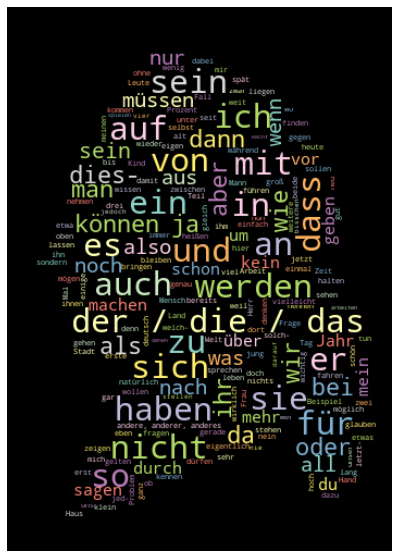

In [20]:
wc = WordCloud(background_color='black', collocations=False, relative_scaling =1,random_state=1, 
               mask = goethe_mask, width=3000, height=2000, colormap='Set3').generate_from_frequencies(dict(tuples))


plt.figure(figsize = [15,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [48]:
#almanya bayraginda son olarak gösterelim
#source for flag: https://www.countryflags.com/en/germany-flag-image.html
de_mask = np.array(Image.open("ger_flag.png"))
de_mask

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[255, 206,   0],
        [255, 206,   0],
        [255, 206,   0],
        ...,
        [255, 206,   0],
        [255, 206,   0],
        [255, 206,   0]],

       [[255, 206,   0],
        [255, 206,   0],
        [255, 206,   0],
        ...,
        [255, 206,   0],
        [255, 206,   0],
        [255, 206,   0]],

       [[255, 206,   0],
        [255, 206,   0],
        [255, 206,   0],
        ...,
        [255, 206,   0],
        [255, 206,   0],
        [255, 206,   0]]

In [22]:
#o li degerler var dönüsüm yapilmasi gerekiyor
def transform_format(image_array):
    for val in image_array:
        if val ==0:
            return 255
        else:
            return val

In [23]:
# Transform your mask into a new one that will work with the function:
transformed_de_mask = np.ndarray((de_mask.shape[0],de_mask.shape[1]), np.int32)

for i in range(len(de_mask)):
    transformed_de_mask[i] = list(map(transform_format, de_mask[i]))
    
# Check the expected result of your mask
transformed_de_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

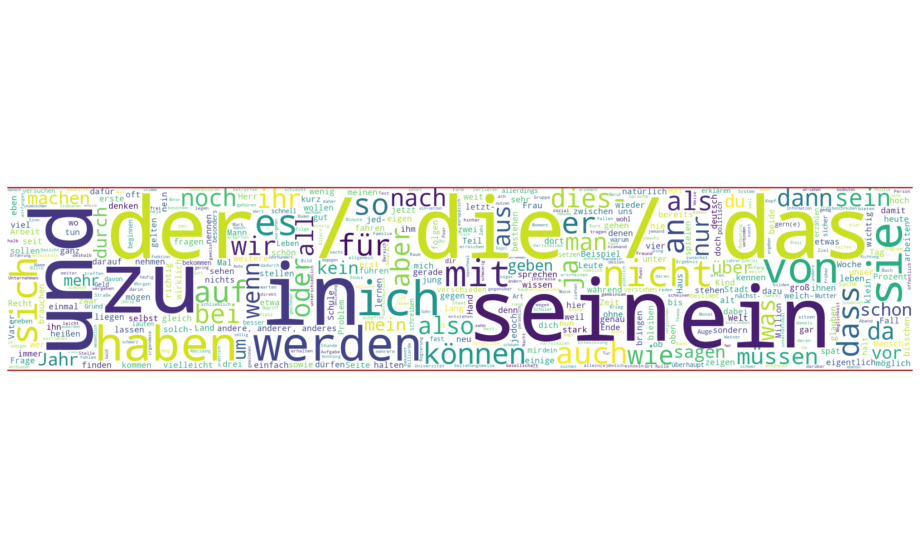

In [51]:
#seffaf background icin kullanilabilir
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_de_mask, 
               contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate_from_frequencies(dict(tuples))

# store to file (dosyaya yeni olarak kaydetmek icin)
#wc.to_file("img/wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

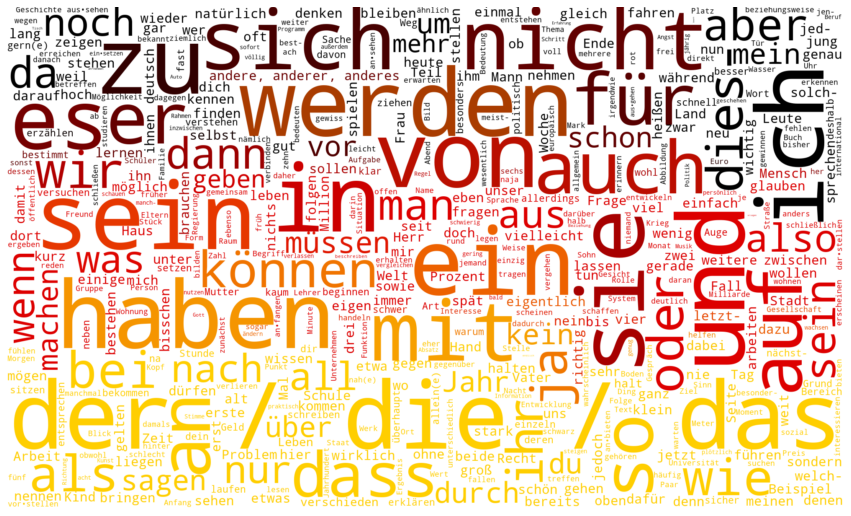

In [57]:
#source for flag: https://www.countryflags.com/en/germany-flag-image.html
mask = np.array(Image.open("ger_flag.png"))
wc_ger = WordCloud(background_color="white", mode="RGBA", max_words=500, width=3000, height=2000, 
                   mask=mask).generate_from_frequencies(dict(tuples))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[15,20])
plt.imshow(wc_ger.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
#plt.savefig("img/us_wine.png", format="png")

plt.show()